In [21]:
# ==============================
# Step 1: Import Required Libraries
# ==============================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# ==============================
# Step 2: Load Dataset
# ==============================
df = pd.read_csv("/content/drive/MyDrive/Data Set For Task/4) house Prediction Data Set.csv")
print("Initial Dataset Shape:", df.shape)
df.head()


Initial Dataset Shape: (505, 1)


,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...


In [22]:
# ==============================
# Level 1 - Task 1: Data Cleaning and Preprocessing
# ==============================
import pandas as pd

# Step 1: Read each row as a line of text
df_raw = pd.read_csv("/content/drive/MyDrive/Data Set For Task/4) house Prediction Data Set.csv", header=None)

# Step 2: Split using regex for multiple spaces or tabs, drop empty columns
df_split = df_raw[0].str.strip().str.split(r'\s+', expand=True)

# Step 3: Drop extra empty columns (if any)
df_split = df_split.loc[:, df_split.columns[df_split.notna().all()]]

# Step 4: Convert to float
df_split = df_split.astype(float)

# Step 5: Assign proper Boston Housing column names
df_split.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS',
                    'RAD','TAX','PTRATIO','B','LSTAT','MEDV']

# Final cleaned dataframe
df = df_split.copy()
df.head()



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

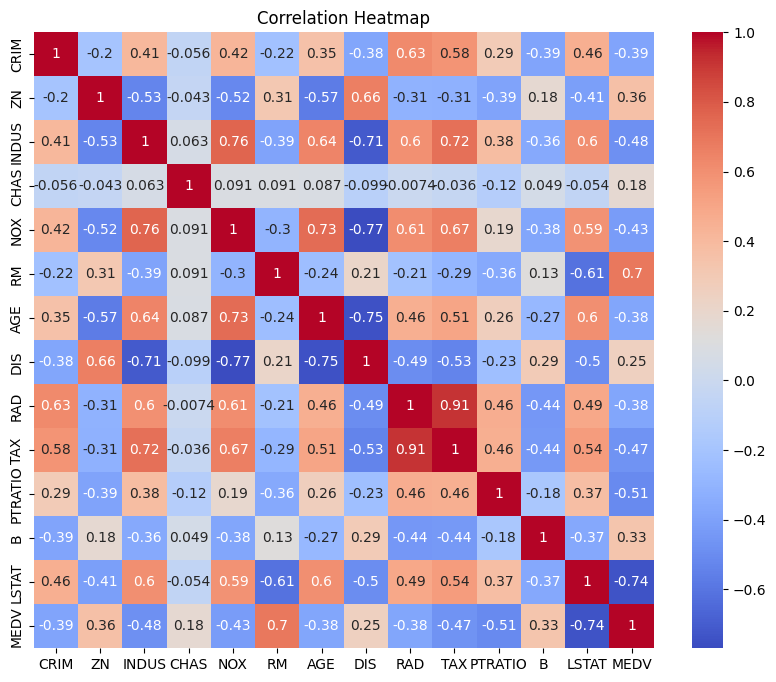

In [23]:
# ==============================
# Level 1 - Task 2: Exploratory Data Analysis (EDA)
# ==============================

import matplotlib.pyplot as plt
import seaborn as sns

# Summary stats
print(df.describe())

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()




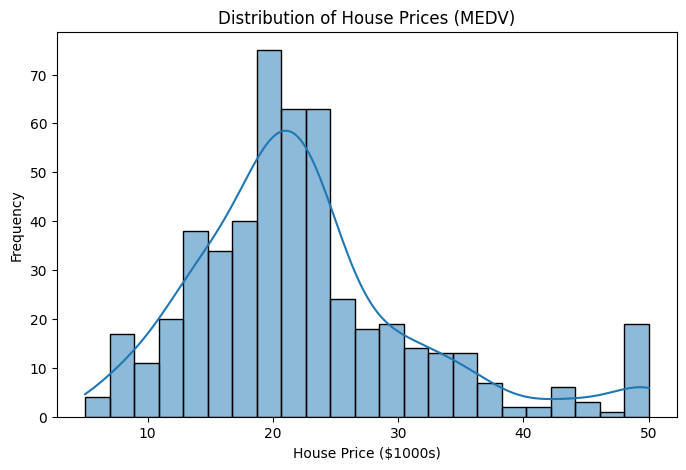

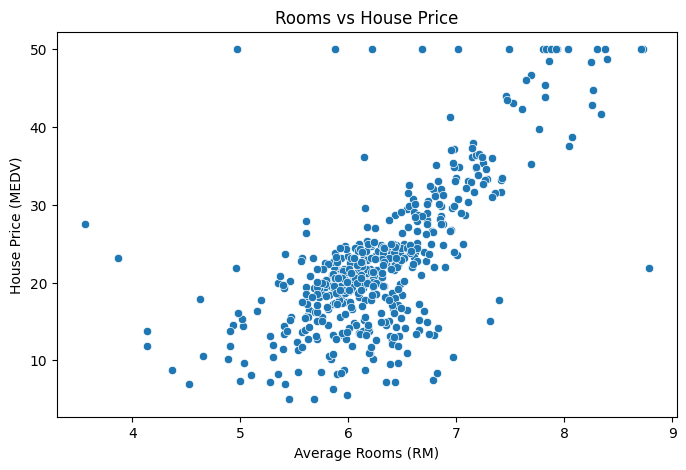

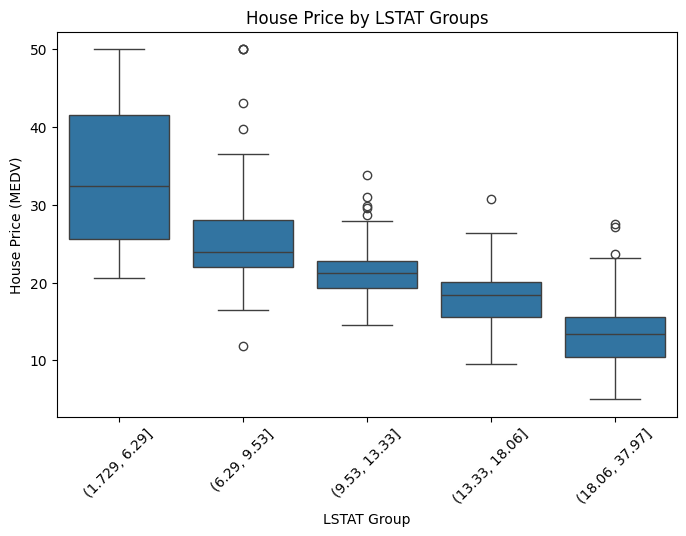

In [25]:
# ==============================
# Level 1 - Task 3: Basic Data Visualization
# ==============================

# Histogram for house price
plt.figure(figsize=(8, 5))
sns.histplot(df['MEDV'], kde=True)
plt.title("Distribution of House Prices (MEDV)")
plt.xlabel("House Price ($1000s)")
plt.ylabel("Frequency")
plt.show()


# Scatter plot: sqft_living vs price
plt.figure(figsize=(8, 5))
sns.scatterplot(x='RM', y='MEDV', data=df)
plt.title("Rooms vs House Price")
plt.xlabel("Average Rooms (RM)")
plt.ylabel("House Price (MEDV)")
plt.show()

# Boxplot: price by number of bedrooms
plt.figure(figsize=(8, 5))
sns.boxplot(x=pd.qcut(df['LSTAT'], 5), y='MEDV', data=df)
plt.title("House Price by LSTAT Groups")
plt.xlabel("LSTAT Group")
plt.ylabel("House Price (MEDV)")
plt.xticks(rotation=45)
plt.show()



Regression Coefficient: [9.34830141]
Regression Intercept: -36.24631889813795
R² Score: 0.3707569232254778
Mean Squared Error: 46.144775347317264


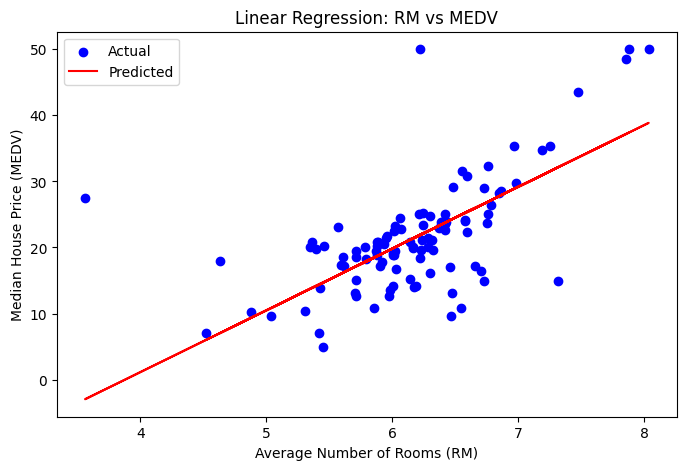

In [27]:
# ==============================
# Level 2 - Task 1: Regression Analysis
# ==============================

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Use RM (average rooms per dwelling) as predictor
X = df[['RM']]
y = df['MEDV']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("Regression Coefficient:", model.coef_)
print("Regression Intercept:", model.intercept_)
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

# Plot Actual vs Predicted
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.title("Linear Regression: RM vs MEDV")
plt.xlabel("Average Number of Rooms (RM)")
plt.ylabel("Median House Price (MEDV)")
plt.legend()
plt.show()


In [28]:

# ==============================
# Level 2 - Task 2: Time Series Analysis
# ==============================

# Convert 'date' column if available
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)

    # Resample monthly average price
    monthly_price = df['price'].resample('M').mean()

    # Plot
    plt.figure(figsize=(10, 5))
    monthly_price.plot()
    plt.title("Monthly Average House Price Trend")
    plt.ylabel("Average Price")
    plt.xlabel("Date")
    plt.grid(True)
    plt.show()

    # Optional: Decompose
    from statsmodels.tsa.seasonal import seasonal_decompose
    result = seasonal_decompose(monthly_price.dropna(), model='additive')
    result.plot()
    plt.show()


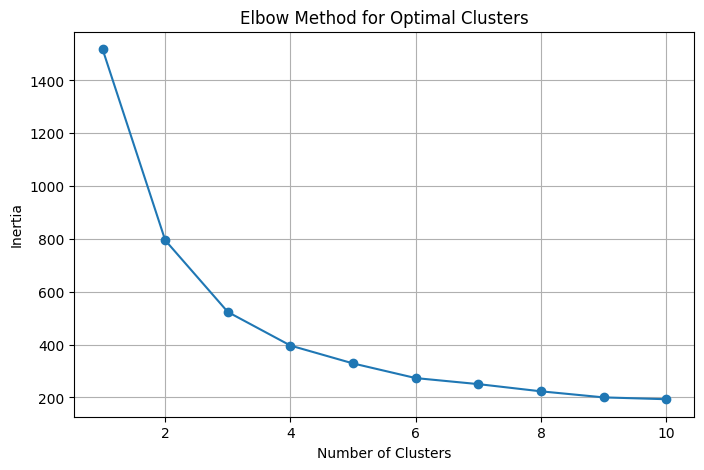

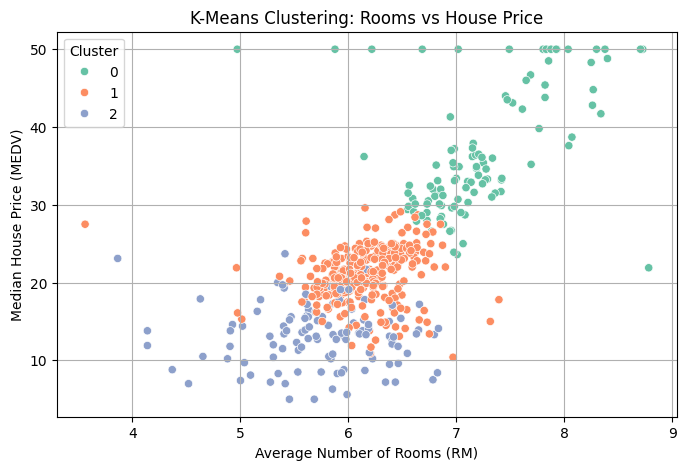

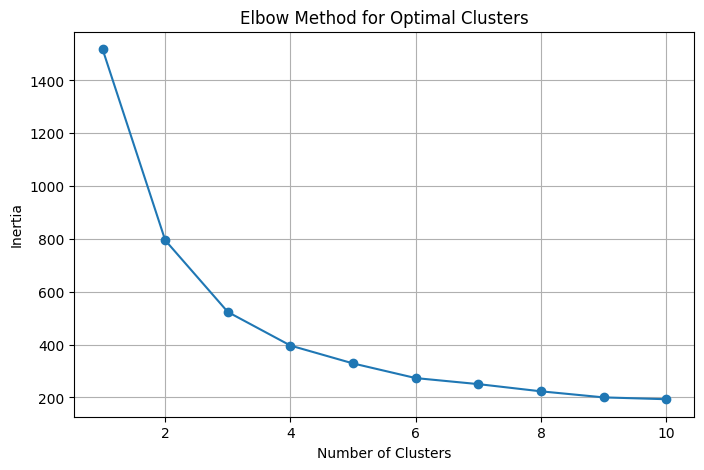

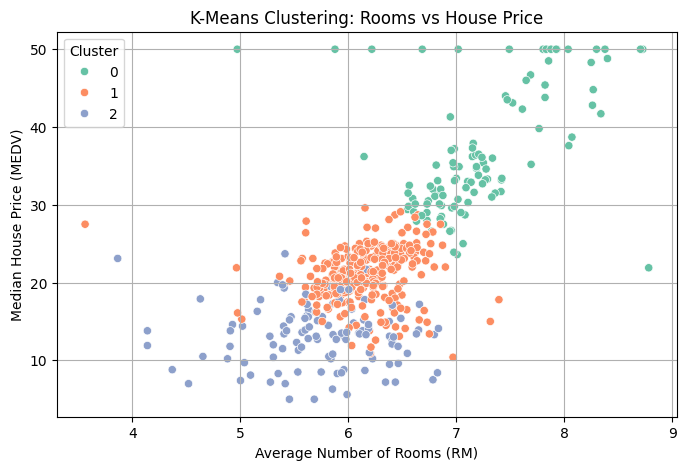

In [33]:
# ==============================
# Level 2 - Task 3: K-Means Clustering
# ==============================

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Use actual column names
features = df[['RM', 'LSTAT', 'MEDV']]  # You can use 2 or 3 features

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Find optimal number of clusters using Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


# Apply KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)

# Visualize clusters in 2D (using RM and MEDV)
plt.figure(figsize=(8, 5))
sns.scatterplot(x='RM', y='MEDV', hue='cluster', palette='Set2', data=df)
plt.title("K-Means Clustering: Rooms vs House Price")
plt.xlabel("Average Number of Rooms (RM)")
plt.ylabel("Median House Price (MEDV)")
plt.legend(title="Cluster")  # ✅ Fixed this line
plt.grid(True)
plt.show()




In [34]:
# ==============================
# Level 3 - Task 1: Predictive Modeling (Classification)
# ==============================
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# ------------------------------
# Step 1: Convert Regression Target (MEDV) → Classification Labels
# ------------------------------
median_price = df['MEDV'].median()
df['Price_Category'] = (df['MEDV'] >= median_price).astype(int)  # 1=High, 0=Low

# ------------------------------
# Step 2: Select Features and Target
# ------------------------------
X = df.drop(['MEDV', 'Price_Category', 'cluster'], axis=1, errors='ignore')  # Drop targets/clusters if present
y = df['Price_Category']

# ------------------------------
# Step 3: Preprocess Data
# ------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------
# Step 4: Train/Test Split
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ------------------------------
# Step 5: Train Models
# ------------------------------

# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Decision Tree
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# ------------------------------
# Step 6: Evaluation
# ------------------------------
print("📌 Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log), "\n")

print("📌 Decision Tree")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))
print(confusion_matrix(y_test, y_pred_tree), "\n")

print("📌 Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))


📌 Logistic Regression
Accuracy: 0.8725490196078431
              precision    recall  f1-score   support

           0       0.91      0.86      0.88        58
           1       0.83      0.89      0.86        44

    accuracy                           0.87       102
   macro avg       0.87      0.87      0.87       102
weighted avg       0.87      0.87      0.87       102

[[50  8]
 [ 5 39]] 

📌 Decision Tree
Accuracy: 0.8627450980392157
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        58
           1       0.84      0.84      0.84        44

    accuracy                           0.86       102
   macro avg       0.86      0.86      0.86       102
weighted avg       0.86      0.86      0.86       102

[[51  7]
 [ 7 37]] 

📌 Random Forest
Accuracy: 0.8725490196078431
              precision    recall  f1-score   support

           0       0.91      0.86      0.88        58
           1       0.83      0.89      0.86        44
